# Investigate a Dataset
## Udacity Data Analyst Nanodegree - Project 2

### Introduction
This notebook investigates the [Titanic](https://www.kaggle.com/c/titanic/data) dataset containing demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic.

### Questions
The analysis of the Titanic dataset deals mainly with the relationship between survival of an individual and variables such as his:
* sex
* age
* passenger class
* ticket (fare) price
* number of siblings/spouses on board
* number of parents/children on board

Therefore we are investigating the following main question: **Which factors made survival of an individual more likely?**

During the course of analysis we are also  looking at the following specific questions:
1. How did sex, age and socio-economic (passenger class / ticket price) status influence survival?
2. How did relationships on board (number of siblings/spouses/parents/children) influence survival?

### Resources
* Udacity "Intro to data analysis" material
* [Python 3 documentation](https://docs.python.org/3/)
* [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/)
* [NumPy documentation](http://docs.scipy.org/doc/)
* [Matplotlib documentation](http://matplotlib.org/contents.html#)
* [Seaborn documentation](https://stanford.edu/~mwaskom/software/seaborn/)
* [Markdown documentation](https://daringfireball.net/projects/markdown/syntax)
* [20 Python libraries you aren't using (but should)](https://www.oreilly.com/learning/20-python-libraries-you-arent-using-but-should)

### Environment setup

In [130]:
# load required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display plots inside the notebook
%matplotlib inline

# ensure compatibility with Python 2.x
# from __future__ import print_function

### Data ingestion

In [131]:
# load dataset from local file system
titanic = pd.read_csv("titanic_data.csv")

### Data exploration

Let's explore the dataset by printing its shape, the first and last 5 rows of data, and calculating some summary statistics

In [132]:
# print shape rows, columns) of data set
titanic.shape

(891, 12)

In [133]:
# show first 5 rows of dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [134]:
# show last 5 rows of dataset
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


#### Summary statistics

Looking at each variable indepdently the summary statistics tell us that:
* PassengerId: There were 891 passengers on board
* Survived: Only 38% of these passengers survived.
* PClass: Only few passengers could afford first class, most, about 50%, spent their time on board in third class
* Age: Only 714 observations contain information for age, could this variable be a potential candidate for a data cleaning exercise? Mean age 30 with high standard deviation, youngest passenger still a baby, oldest passenger an old person at age 80. He or she seems to be an extreme outlier, since the average age in the third percentile is 38.
* SibSp: Mean value of 0.52 is somewhat misleading, since one can't have half a sibling or family member on board. Interestingly the standard deviation is quite high. Looking at the max value, there seems to be either a large family on board or someone married to many wifes (max = 8)
* Parch: There seems to be a large family onboard (max = 6)
* Fare: Mean price for a titanic ticket was 32 USD, although the standard deviationn is quite high (USD 50). Apparently some passengers did not pay anything for their ticket (min = 0), while some potentially wealthy passengers paid up to 512 USD (max = 512).

Given the summary statistics we might investigate the following questions:
* What does high standard deviation of Survied mean? Are their differences between gender, age, socio-economic status, etc.?
* Who were the youngest and oldest passenger on board (Age = 0.42/80)
* Who belonged to the large family?
* Who paid nothing at all and the maxium price?

In [135]:
# calculate summary statistics
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Helper functions

In [136]:
# helper functions to print rows containing the min/max value of a variable
def titanic_min(variable):
    """
    Given a variable present in the titanic data set, the function prints the rows containing the min value
    """
    print("Information for min values of %s:" % variable)
    print(titanic.ix[titanic[variable] == min(titanic[variable])])
    
def titanic_max(variable):
    """
    Given a variable present in the titanic data set, the function prints the row containing the max value
    """
    print("Information for max values of %s:" % variable)
    print(titanic.ix[titanic[variable] == max(titanic[variable])])

#### Visualization
Besides looking at plain figures, we also like to investigate our data visually.

Let's look at **surivial** first. From the bar chart below we can see that only about 350 of 891 passengers survived their trip.

[<matplotlib.text.Text at 0x1117dcc0>, <matplotlib.text.Text at 0x10fa1ac8>]

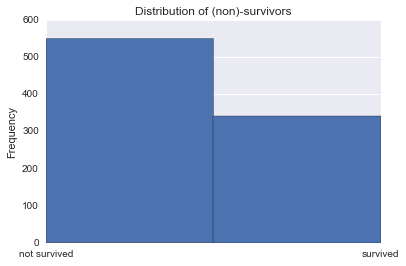

In [137]:
# plot survival data 
titanic["Survived"].plot(kind="hist", title="Distribution of (non)-survivors", bins=2, xticks=(0,1)).set_xticklabels(["not survived", "survived"])

What about **passenger class**? Apparently half of passengers were traveling in  third class. The other half almost equally split into second and first class.

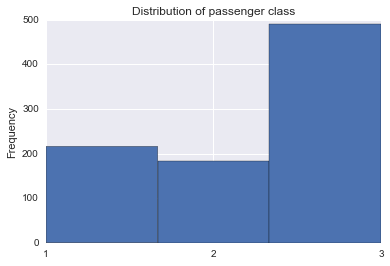

In [138]:
# plot passenger class data
titanic["Pclass"].plot(kind="hist", title="Distribution of passenger class", bins=3, xticks=(1,2,3))

Next, let's investigate the **age** distribution of Titanic passengers. Apparently most of the passengers were between 20 and 30 years old. From the histogram it is evident that there were some very old passengers, too.

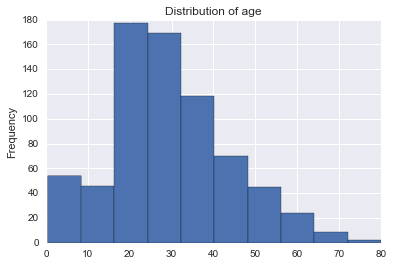

In [139]:
# plot age data
titanic["Age"].plot(kind="hist", title="Distribution of age")

Now let's have a look at extreme ages. How old were the youngest/oldest passengers?
As can be seen from the output below, the youngest passenger was **not even 1 year old**, while the oldest passenger was already **80**. Interestingly both survived, despite travelling in different passenger classes.

In [140]:
# print information about youngest passenger
titanic_min("Age")

Information for min values of Age:
     PassengerId  Survived  Pclass                             Name   Sex  \
803          804         1       3  Thomas, Master. Assad Alexander  male   

      Age  SibSp  Parch Ticket    Fare Cabin Embarked  
803  0.42      0      1   2625  8.5167   NaN        C  


In [141]:
# print information about oldest passenger
titanic_max("Age")

Information for max values of Age:
     PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex  Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male   80      0      0  27042    30   A23        S  


Let's look at distribution of siblings/spouses of Titanic passengers. Interestingly, most passengers either did not have any or just one siblings/spouses on board, while there was one family (or someone with a lot of spouses) with **8** relatives on board. 

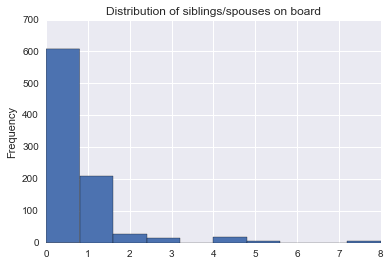

In [142]:
# plot sibling/spouse data
titanic["SibSp"].plot(kind="hist", title="Distribution of siblings/spouses on board")

Now who was the family with maxium number of relatives?. As can be seen from the table below, it was the **Sage** family, which unfortunately did not survive their journey.

In [143]:
# print information about max/min values
titanic_max("SibSp")

Information for max values of SibSp:
     PassengerId  Survived  Pclass                               Name     Sex  \
159          160         0       3         Sage, Master. Thomas Henry    male   
180          181         0       3       Sage, Miss. Constance Gladys  female   
201          202         0       3                Sage, Mr. Frederick    male   
324          325         0       3           Sage, Mr. George John Jr    male   
792          793         0       3            Sage, Miss. Stella Anna  female   
846          847         0       3           Sage, Mr. Douglas Bullen    male   
863          864         0       3  Sage, Miss. Dorothy Edith "Dolly"  female   

     Age  SibSp  Parch    Ticket   Fare Cabin Embarked  
159  NaN      8      2  CA. 2343  69.55   NaN        S  
180  NaN      8      2  CA. 2343  69.55   NaN        S  
201  NaN      8      2  CA. 2343  69.55   NaN        S  
324  NaN      8      2  CA. 2343  69.55   NaN        S  
792  NaN      8      2  CA. 2

What about the distribution of parents/childeren onboard of Titanic? The figure below shows that the majority of passengers did not have any children on board. As seen within the siblings/spouses data, there is one extreme case which we investigate below.

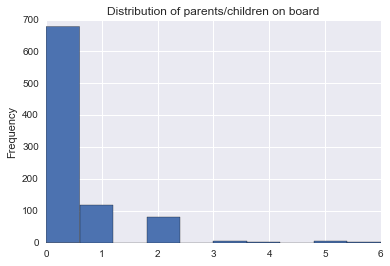

In [144]:
# plot parent/child data
titanic["Parch"].plot(kind="hist", title="Distribution of parents/children on board")

Apparently, Mrs. Goodwin was accompanied by **6 children** and unfortunately did not survive her trip.

In [145]:
# print information about min/max parent/child data
titanic_max("Parch")

Information for max values of Parch:
     PassengerId  Survived  Pclass                                     Name  \
678          679         0       3  Goodwin, Mrs. Frederick (Augusta Tyler)   

        Sex  Age  SibSp  Parch   Ticket  Fare Cabin Embarked  
678  female   43      1      6  CA 2144  46.9   NaN        S  


Finally, let's dig into the distribution of fare prices. Obviously most passengers paid well below USD 100 for their ticket. There are a some passengers who paid more, e.g. between USD 100 and USD 300 while a few payed as much as USD 500.

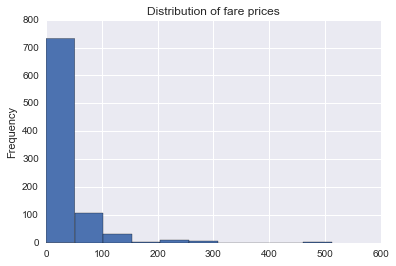

In [146]:
# plot fare data
titanic["Fare"].plot(kind="hist", title="Distribution of fare prices")

From the boxplot below we can see that the median fare price was well below USD 100 (from cell 5 we actually know that the average is USD 32 with standard deviation of approximately USD 50. Furthermore the fare price of roughly USD 500 seems to be an outlier. 

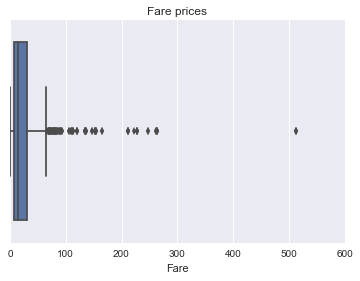

In [147]:
# plot fare data as box plot
ax = sns.boxplot(titanic["Fare"], orient="h")
ax.set_title("Fare prices")

Now let's check the minium fare price. Intergestingly the minimum price is USD 0, meaning that 15 passengers did not pay for their ticket at all.

In [148]:
# print passengers who paid the minimum fare price
titanic_min("Fare")

Information for min values of Fare:
     PassengerId  Survived  Pclass                              Name   Sex  \
179          180         0       3               Leonard, Mr. Lionel  male   
263          264         0       1             Harrison, Mr. William  male   
271          272         1       3      Tornquist, Mr. William Henry  male   
277          278         0       2       Parkes, Mr. Francis "Frank"  male   
302          303         0       3   Johnson, Mr. William Cahoone Jr  male   
413          414         0       2    Cunningham, Mr. Alfred Fleming  male   
466          467         0       2             Campbell, Mr. William  male   
481          482         0       2  Frost, Mr. Anthony Wood "Archie"  male   
597          598         0       3               Johnson, Mr. Alfred  male   
633          634         0       1     Parr, Mr. William Henry Marsh  male   
674          675         0       2        Watson, Mr. Ennis Hastings  male   
732          733         0  

In [149]:
# print number of passengers with minimum ticket price
len(titanic[titanic["Fare"] == 0])

15

What about the maxium fare price? Obviously three passengers were willing to pay the maxium price of **USD 512**, which is 16 times higher than the average price USD 32. At least all three got a ticket for the first passenger class!

In [150]:
# print passengers who paid the maximum fare price
titanic_max("Fare")

Information for max values of Fare:
     PassengerId  Survived  Pclass                                Name  \
258          259         1       1                    Ward, Miss. Anna   
679          680         1       1  Cardeza, Mr. Thomas Drake Martinez   
737          738         1       1              Lesurer, Mr. Gustave J   

        Sex  Age  SibSp  Parch    Ticket      Fare        Cabin Embarked  
258  female   35      0      0  PC 17755  512.3292          NaN        C  
679    male   36      0      1  PC 17755  512.3292  B51 B53 B55        C  
737    male   35      0      0  PC 17755  512.3292         B101        C  


### Data cleaning

Before moving on to actual analysis the data needs to be cleaned. During the exploration phase we discovered missing values for **Age** and **Cabin**. Furthermore some passengers were not assigned a proper ticket ID, but the value "Line". Another candidate for cleaning could be various extreme values in fare price, siblings/spouses or parents/children. How do we decide which values to keep and which to clean? One approach would be to go back to our initial question and check whether missing values in particular columns could impede analysis. As we are primary interested in factors influencing **survival**, e.g. sex, age, passenger class and other socio-economic variables, we should focus on these during data cleaning

Let's start with investigating real missing values: Age information is missing for 20% of all passengers, while cabin information is missing for **77**% of all passengers. Why do we have so little information on cabins?

In [151]:
# for each column print number of records where information is missing
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [152]:
# for reach column print missing values as percentage of total values
titanic.isnull().sum() / titanic.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

Let's dig deeper into missing age and cabin data. Checking passengers travelling in third class for missing data reveals that most of our issues can be found there. **77**% of missing age and **70%** of missing cabin values are attached to passengers in the third class.

In [153]:
# print a subset of records with missing age information
titanic.ix[titanic["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [154]:
# print a subset of records with missing cabin information
titanic.ix[titanic["Cabin"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S


In [155]:
# for each column where PClass is equal to 3, print number of records where information is missing
titanic[titanic["Pclass"] == 3].isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            136
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          479
Embarked         0
dtype: int64

In [156]:
# for reach column where PClass is equal to 3, print missing values as percentage of total values
titanic[titanic["Pclass"] == 3].isnull().sum() / titanic.isnull().sum()

PassengerId         NaN
Survived            NaN
Pclass              NaN
Name                NaN
Sex                 NaN
Age            0.768362
SibSp               NaN
Parch               NaN
Ticket              NaN
Fare                NaN
Cabin          0.697234
Embarked       0.000000
dtype: float64

What could be a possible explanation for that? Apparently third class had bunk beds for 4-6 people. Maybe data was not rigorously recorded for this class, see: https://nmni.com/titanic/On-Board/Sleeping.aspx

Although there does not seem to be a substantial problem with Embarked and Ticket information, let's have a brief look at the missing values:

In [157]:
# print records with missing embarked information
titanic.ix[titanic["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80,B28,NaN


In [158]:
# print records where the value for ticket is "line"
titanic.ix[titanic["Ticket"] == "LINE"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36,0,0,LINE,0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25,0,0,LINE,0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19,0,0,LINE,0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49,0,0,LINE,0,NaN,S


Now, which data we want to omit for the analysis? Since our analysis mainly focuses on personal data like age, and socio-economic information, we first **remove all columns containing data which does not help to investigate these variables**, such as:
* PassengerId
* Name
* Ticket
* Cabin
* Embarked

In [159]:
# remove PassengerId, Name, Ticket, Cabin and Embarked column
titanic_cleaned = titanic.drop(labels=["PassengerId", "Name", "Ticket", "Cabin", "Embarked"], axis=1, inplace=False)

Further we **remove the outlier values (max values) for fare prices**:

In [160]:
# remove fare price outliers
titanic_cleaned.drop(titanic_cleaned.index[[258, 679, 737]], inplace=True)

# verify that used-to-be max values for Fare have been removed
titanic_cleaned["Fare"].max()

263.0

We do also **drop all rows _not_ containing age information**:

In [161]:
# remove any records with missing age information
titanic_cleaned.dropna(subset=["Age"], inplace=True)

Finally we check if any missing values and remain, which is not the case. We are left with **711 rows** of cleaned data:

In [162]:
# check whether rows with missing age information were succesfully removed
titanic_cleaned.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [163]:
# print number of rows remaining after cleaning
titanic_cleaned.shape[0]

711

### Analysis

After exploring and cleaning the data, we are finally able to analyze our main question:
**Which factors made survival of an individual more likely?** In order to start investigating this question, we would like to know how **survival** is correlated with other variables in the dataset. Although this does not imply causation, i.e. a strong positive correlation between **surival** and travelling in **the first passenger class** does **not proof**, that passengers surived because they travelled in first class. Maybe first class passengers where particulary wealthy and could afford personal that saved them in case of emergency. Taking this into account, using correlation between variables is still a good start for deeper analysis.

In [164]:
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22,1,0,7.2500
1,1,1,female,38,1,0,71.2833
2,1,3,female,26,0,0,7.9250
3,1,1,female,35,1,0,53.1000
4,0,3,male,35,0,0,8.0500


Let's start with age. Instead of correlating Survived with individual ages, we form three age groups (young, middle and old) and use these for analysis:

In [165]:
# bin age into young, middle, old buckets
titanic_cleaned["age"] = pd.cut(titanic["Age"], bins=3, labels=["young", "middle", "old"])
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age
0,0,3,male,22,1,0,7.2500,young
1,1,1,female,38,1,0,71.2833,middle
2,1,3,female,26,0,0,7.9250,young
3,1,1,female,35,1,0,53.1000,middle
4,0,3,male,35,0,0,8.0500,middle


We apply the same logic to fare prices:

In [166]:
# bin fare prices into low, medium, high buckets
titanic_cleaned["fare"] = pd.cut(titanic["Fare"], bins=3, labels=["low", "medium", "high"])
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age,fare
0,0,3,male,22,1,0,7.2500,young,low
1,1,1,female,38,1,0,71.2833,middle,low
2,1,3,female,26,0,0,7.9250,young,low
3,1,1,female,35,1,0,53.1000,middle,low
4,0,3,male,35,0,0,8.0500,middle,low


Further, instead of correlating individual values for siblings/spouses and parents/children, we create the dummy variable "family" to indicate whether a passenger had at leat 1 sibling/spouse **or** 1 parent/child on board.

In [167]:
# create dummy variable "family" to indicate whether a passenger had at leat one sibling/spouse OR parent/child on board
titanic_cleaned["family"] = (titanic["SibSp"] >= 1) | (titanic["Parch"] >=1)
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,age,fare,family
0,0,3,male,22,1,0,7.2500,young,low,True
1,1,1,female,38,1,0,71.2833,middle,low,True
2,1,3,female,26,0,0,7.9250,young,low,False
3,1,1,female,35,1,0,53.1000,middle,low,True
4,0,3,male,35,0,0,8.0500,middle,low,False


Finally, we convert our recently created variables (age, fare, family), as well as Sex and passenger class into dummy variables.

In [168]:
# convert categorical variables (Sex and PClass) into dummy variables for analysis
titanic_dummies = pd.get_dummies(data=titanic_cleaned, columns=["Sex", "Pclass", "age", "family", "fare"])
titanic_dummies.drop(labels=["Age", "SibSp", "Parch", "Fare"], axis=1, inplace=True)
titanic_dummies.head()

,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,age_young,age_middle,age_old,family_False,family_True,fare_low,fare_medium,fare_high
0,0,0,1,0,0,1,1,0,0,0,1,1,0,0
1,1,1,0,1,0,0,0,1,0,0,1,1,0,0
2,1,1,0,0,0,1,1,0,0,1,0,1,0,0
3,1,1,0,1,0,0,0,1,0,0,1,1,0,0
4,0,0,1,0,0,1,0,1,0,1,0,1,0,0


Now we are ready to calculate the correlation matrix.

In [169]:
# calculate correlation matrix
titanic_dummies.corr()

,Survived,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,age_young,age_middle,age_old,family_False,family_True,fare_low,fare_medium,fare_high
Survived,1.000000,0.541935,-0.541935,0.295921,0.087969,-0.334242,0.007109,0.016922,-0.046896,-0.198184,0.198184,-0.098645,0.098645,NaN
Sex_female,0.541935,1.000000,-1.000000,0.114089,0.073074,-0.162468,0.060756,-0.029594,-0.060350,-0.282802,0.282802,-0.112065,0.112065,NaN
Sex_male,-0.541935,-1.000000,1.000000,-0.114089,-0.073074,0.162468,-0.060756,0.029594,0.060350,0.282802,-0.282802,0.112065,-0.112065,NaN
Pclass_1,0.295921,0.114089,-0.114089,1.000000,-0.333842,-0.587892,-0.246477,0.128612,0.228117,-0.126347,0.126347,-0.249363,0.249363,NaN
Pclass_2,0.087969,0.073074,-0.073074,-0.333842,1.000000,-0.566267,-0.069983,0.070752,-0.002128,-0.031835,0.031835,0.083248,-0.083248,NaN
Pclass_3,-0.334242,-0.162468,0.162468,-0.587892,-0.566267,1.000000,0.275574,-0.173174,-0.197637,0.137796,-0.137796,0.146599,-0.146599,NaN
age_young,0.007109,0.060756,-0.060756,-0.246477,-0.069983,0.275574,1.000000,-0.868465,-0.248106,-0.116166,0.116166,-0.024992,0.024992,NaN
age_middle,0.016922,-0.029594,0.029594,0.128612,0.070752,-0.173174,-0.868465,1.000000,-0.264779,0.077418,-0.077418,0.023803,-0.023803,NaN
age_old,-0.046896,-0.060350,0.060350,0.228117,-0.002128,-0.197637,-0.248106,-0.264779,1.000000,0.074680,-0.074680,0.002100,-0.002100,NaN
family_False,-0.198184,-0.282802,0.282802,-0.126347,-0.031835,0.137796,-0.116166,0.077418,0.074680,1.000000,-1.000000,0.108215,-0.108215,NaN


Since the correlation matrix is hard to read, we visualize its result using a heatmap.

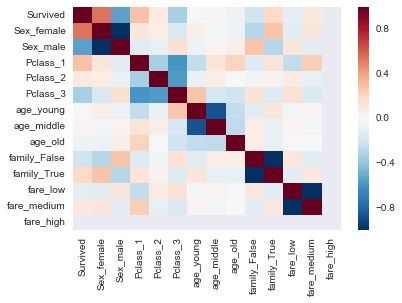

In [170]:
# visualize corrleation matrix
sns.heatmap(titanic_dummies.corr())

Interestingly, we can observe a strong (>= 0.4) positive correlation between **survival** and being female, whereas the opposite is true for being **male**. Further, the correlation matrix shows a moderate positive relation between survival and travelling in **first class**. The opposite is true for residing in **third class**. As far as **age groups** are concerned, no correlation can be observed, while having at least one **family** member on board is modestly corrleated with survival. Finally, **fare price groups** do not seem to have a particular strong positive or negative with survival.

Given the positive relation between survival and being female, between survival and passenger class, as well as between survival and family, we look at these variables using a pivot tables.

Solely comparing survival between sex reveals that women were much more likely to surive then man. Further, passengers travelling in first class were much more likely than those travelling in third class. Finally, half of passengers having a family member on board survived their trip, whereas only 1/3 survived without family support.

In [171]:
# pivot table displaying survival vs. sex
pd.pivot_table(titanic_cleaned, values=["Survived"], index=["Sex"], aggfunc=[np.sum, np.mean, np.std], margins=True)

,sum,mean,std
,Survived,Survived,Survived
Sex,,,
female,196,0.753846,0.43160
male,91,0.201774,0.40177
All,287,0.403657,0.49063


In [172]:
# pivot table displaying survival vs. passenger class
pd.pivot_table(titanic_cleaned, values=["Survived"], index=["Pclass"], aggfunc=[np.sum, np.mean, np.std], margins=True)

,sum,mean,std
,Survived,Survived,Survived
Pclass,,,
1,119,0.650273,0.478192
2,83,0.479769,0.501041
3,85,0.239437,0.427342
All,287,0.403657,0.490630


In [173]:
# pivot table displaying survival vs. family
pd.pivot_table(titanic_cleaned, values=["Survived"], index=["family"], aggfunc=[np.sum, np.mean, np.std], margins=True)

,sum,mean,std
,Survived,Survived,Survived
family,,,
False,128,0.318408,0.466439
True,159,0.514563,0.500599
All,287,0.403657,0.490630


Let's go one step further and investigate survival, sex and passenger class. The table shows that **96%** of **females** travelling in first, and **92%** travelling in **second** class survied their trip. Whereas only **40%** of males in first, and only **15%** in second and third class survived their trip.

In [174]:
# pivot table displaying survival vs. sex and passenger class
pd.pivot_table(titanic_cleaned, values=["Survived"], index=["Sex", "Pclass"], aggfunc=[np.sum, np.mean, np.std], margins=True)

sum      mean       std
              Survived  Survived  Survived
Sex    Pclass                             
female 1            81  0.964286  0.186691
       2            68  0.918919  0.274823
       3            47  0.460784  0.500921
male   1            38  0.383838  0.488794
       2            15  0.151515  0.360375
       3            38  0.150198  0.357973
All                287  0.403657  0.490630

Repeating the same analysis using family and passenger class, we can observe relatively high survival rates for passengers travelling in first class, despite their family status. Although, the difference between passengers having a family member on board and travelling in first class, and those without family support is **10%**. However, the major differences here is between passengers having family and travelling in **second class**. While **63%** of passengers having a family member on board and travelling second class survived the trip, only **34%** without family support did.

In [175]:
# pivot table displaying survival vs. family
pd.pivot_table(titanic_cleaned, values=["Survived"], index=["family", "Pclass"], aggfunc=[np.sum, np.mean, np.std], margins=True)

sum      mean       std
              Survived  Survived  Survived
family Pclass                             
False  1            49  0.583333  0.495968
       2            32  0.344086  0.477644
       3            47  0.208889  0.407421
True   1            70  0.707071  0.457422
       2            51  0.637500  0.483755
       3            38  0.292308  0.456582
All                287  0.403657  0.490630

In order to make it easier to consume our results, we visualize the analysis above:

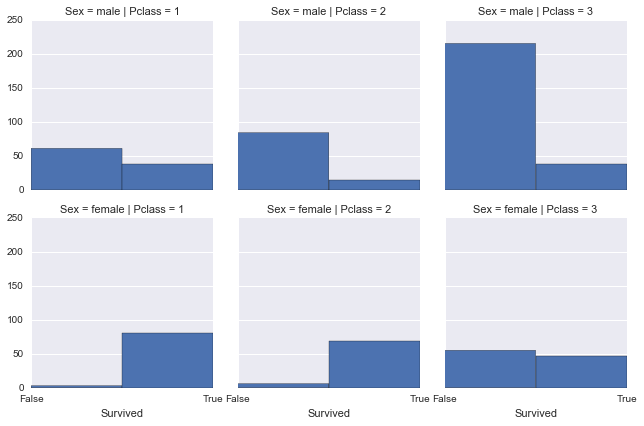

In [176]:
# visualize differences between (non)-survivors given sex and passenger class
grid = sns.FacetGrid(titanic_cleaned, row="Sex", col="Pclass")
grid.map(plt.hist, "Survived", bins=2).set(xticks=(0,1)).set_xticklabels(["False", "True"])

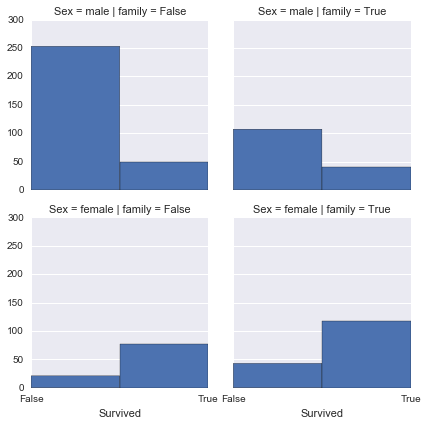

In [177]:
# visualize differences between (non)-survivors given sex and family on board
grid = sns.FacetGrid(titanic_cleaned, row="Sex", col="family")
grid.map(plt.hist, "Survived", bins=2).set(xticks=(0,1)).set_xticklabels(["False", "True"])

### Conclusion
Our general analysis revealed the following points:
* On average women were much more likely to survive their trip on Titanic
* The same is true for passengers travelling in first class
* Passengers having one or more family member on board also survived their trip more often than those without family support

Further, the investigation between survival and more than one variable revealed that:
* Most of the women traveling in first and second class survied their trip, whereas the opposite is true for men
* The data on survival, sex and family on board is inconclusive, since women were on average more likely to surive their trip despite having family no board

Despite our findings, we can not be sure that the variables we found to have an effect on survival, really **caused** it. For instance, there may have been other reasons despite gender, for women to be more likely to survive than men.